In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [48]:
import os
print(os.getcwd())

C:\Users\guniset\Desktop\titanic\test-file


In [49]:
#!pip install opendatasets

import opendatasets as od

titanic = 'https://www.kaggle.com/brendan45774/test-file?select=tested.csv'

os.chdir("/Users/guniset/Desktop/titanic")

od.download(titanic)

print(os.getcwd())
os.chdir("/Users/guniset/Desktop/titanic/test-file")
os.listdir()

# this process is to download the file from KAGLE

Skipping, found downloaded files in ".\test-file" (use force=True to force download)
C:\Users\guniset\Desktop\titanic


['tested.csv']

In [50]:
Titanic = pd.read_csv('tested.csv')

print(Titanic.shape)

(418, 12)


In [51]:
print(Titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [52]:
Titanic.head()
#sibsip = tot cnt of spouse and siblings
#parch  = tot cnt of parent and children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
Titanic.isnull()
# to find null values NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

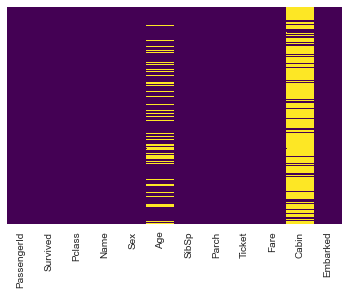

In [54]:
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#to know NaN values 

<AxesSubplot:xlabel='Survived', ylabel='count'>

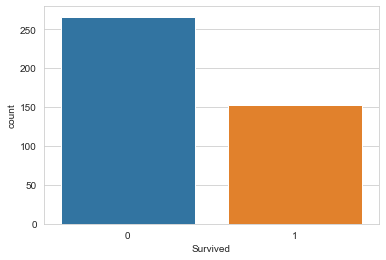

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = Titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

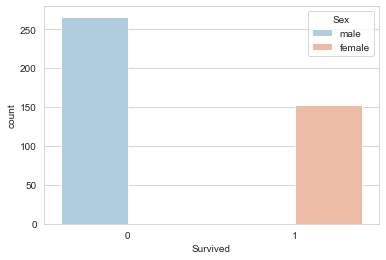

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data = Titanic, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

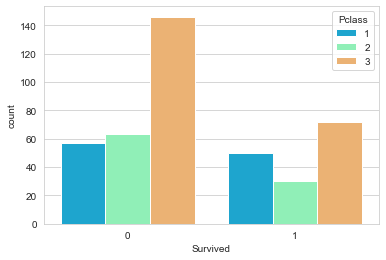

In [57]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived", hue="Pclass", data=Titanic, palette = "rainbow")

C:\Users\guniset\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

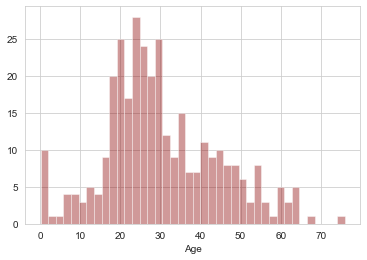

In [58]:
sns.distplot(Titanic["Age"].dropna(),kde=False,color = 'darkred',bins=40)
#kde is Flase - histogram only   True 

<AxesSubplot:>

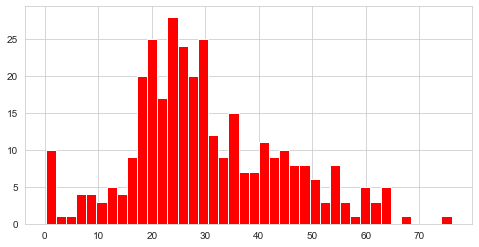

In [59]:
Titanic["Age"].hist(color="red", bins= 40, figsize=(8,4))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

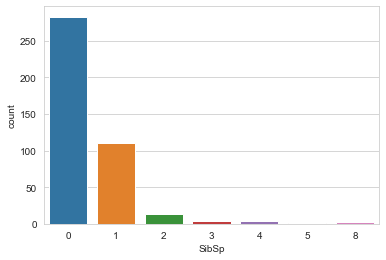

In [60]:
sns.countplot(x="SibSp",data= Titanic)
#people having sibsp

<AxesSubplot:>

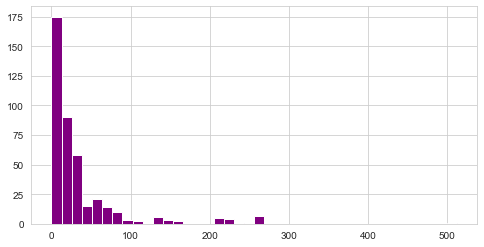

In [61]:
Titanic['Fare'].hist(color='purple', bins=40, figsize=(8,4))
# avg fare people bought 

C:\Users\guniset\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

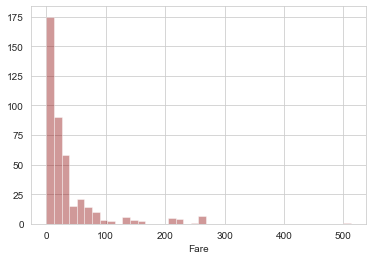

In [62]:
sns.distplot(Titanic["Fare"].dropna(),kde=False,color = 'darkred',bins=40)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

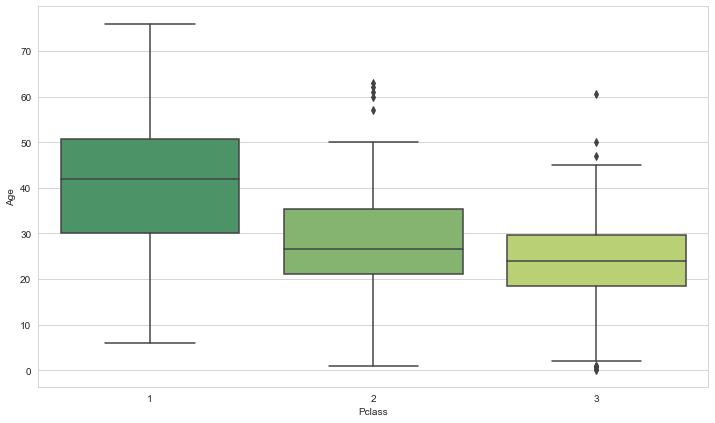

In [63]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=Titanic,palette='summer' )


In [64]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 28
        
        else:
            return 24
    else:
        return Age
    
# to remove null values we take values from Boxplots we consider 50percentile as average values 

In [65]:
Titanic['Age'] = Titanic[['Age','Pclass']].apply(impute_age,axis=1)

#after writing a code we apply it on required column 

<AxesSubplot:>

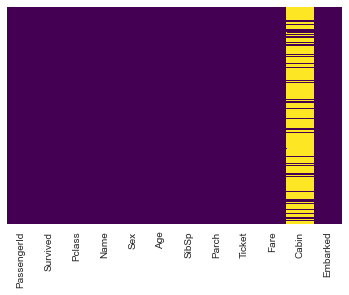

In [66]:
sns.heatmap(Titanic.isnull(),yticklabels = False, cbar=False,cmap='viridis')

#age null values are filled 

In [67]:
Titanic.drop('Cabin',axis=1,inplace=True)
# we are dropping the cabin due to more null values - for now 

In [68]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:>

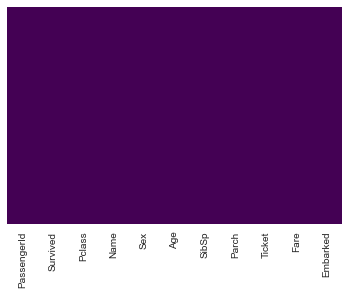

In [69]:
sns.heatmap(Titanic.isnull(),yticklabels = False, cbar=False,cmap='viridis')


In [70]:
Titanic.dropna(inplace=True)

In [71]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [76]:
pd.get_dummies(Titanic["Embarked"],drop_first=True).head()

#we are changing two vlaues into numerical data types

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [77]:
pd.get_dummies(Titanic["Sex"], drop_first = True).head()

,male
0,1
1,0
2,1
3,1
4,0


In [78]:
sex = pd.get_dummies(Titanic["Sex"], drop_first=True)
embark = pd.get_dummies(Titanic["Embarked"],drop_first = True)

In [79]:
Titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace = True)

In [80]:
Titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [81]:
Titanic = pd.concat([Titanic,sex,embark],axis =1 )


In [82]:
Titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [83]:
print(Titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')
